In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
print("Feature names:", feature_names)
print("Target names:", target_names)
print("Shape of data:", X.shape)
print("Number of malignant cases:", sum(y == 0))
print("Number of benign cases:", sum(y == 1))

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of data: (569, 30)
Number of malignant cases: 212
Number of benign cases: 357


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

In [6]:
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, 
                yticklabels=target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Evaluation for Logistic Regression:
Accuracy: 0.9766081871345029
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1 Score: 0.9814814814814815

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



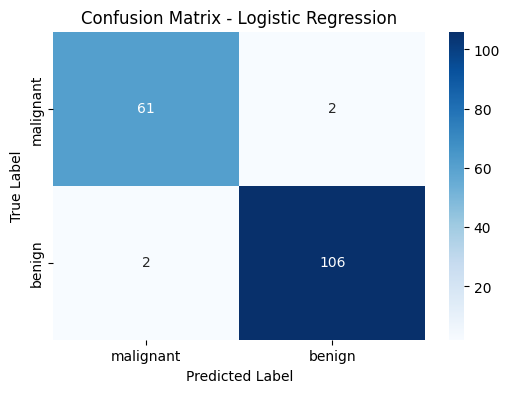


Evaluation for Decision Tree:
Accuracy: 0.9415204678362573
Precision: 0.9711538461538461
Recall: 0.9351851851851852
F1 Score: 0.9528301886792453

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



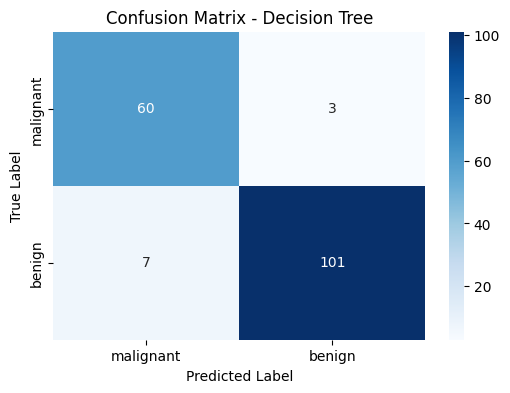

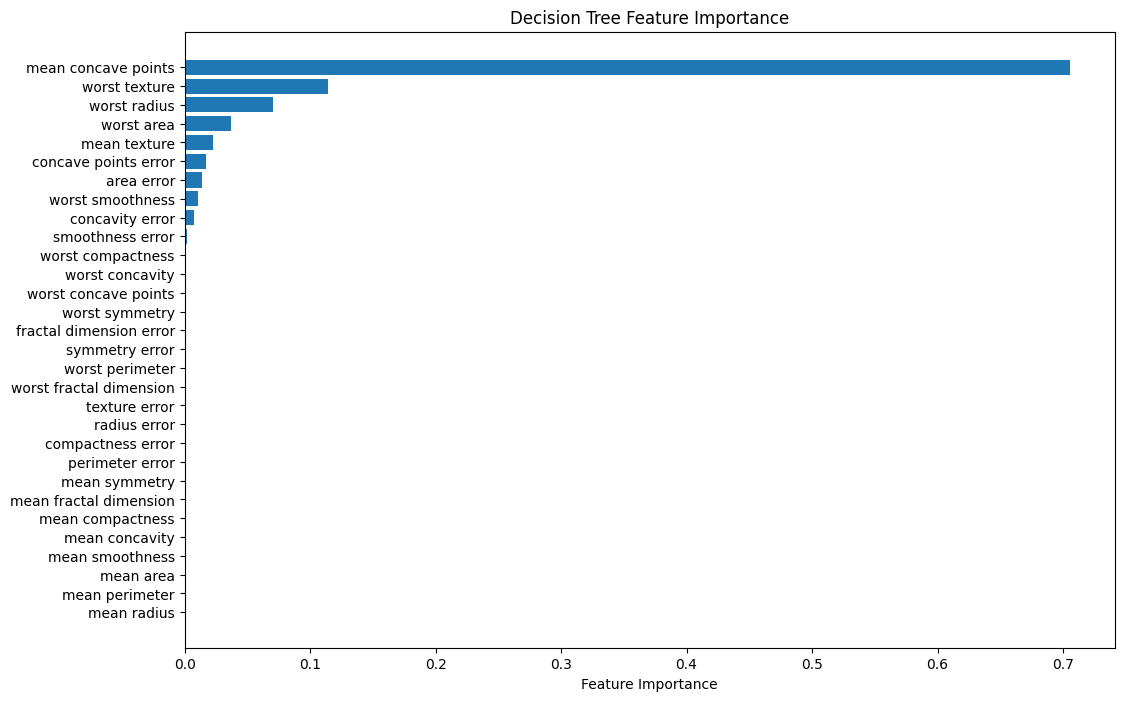

In [9]:
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

plt.figure(figsize=(12, 8))
importances = dt_clf.feature_importances_
sorted_idx = importances.argsort()
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()